Import Libraries
pandas (pd) – Handles and analyzes structured tabular data efficiently.

numpy (np) – Performs fast numerical computations on arrays and matrices.

matplotlib.pyplot (plt) – Creates static and customizable data visualizations.

seaborn (sns) – Generates attractive, statistical, and easy-to-interpret plots.

sklearn.cluster.KMeans – Performs unsupervised clustering to group similar data points.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load your dataset: 
pd.read_csv() reads the CSV file into a DataFrame — the main data structure in pandas.
.head() shows the first 5 rows to verify loading.   r- to treat literally path

In [6]:
data = pd.read_csv(r"C:\Users\er_si\Desktop\Corporate Institutions Trainings & Business\Final Clients Trainings\Educational Institutes\RPS-Wipro\datasets\Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Select Features
We only select relevant columns (numerical ones) that describe customer behavior.
K-Means needs numeric data — text columns like “Gender” are excluded or encoded separately.

In [7]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


Scale data
Why scale? Different units cause imbalance (e.g., “Age” is 20–60, but “Income” can be 15–120).
StandardScaler() converts data so each column has:
Mean = 0
Standard Deviation = 1
This prevents one feature (like income) from dominating the model.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Determine Optimal K (Elbow Method)
Goal: Find the best number of clusters (K).
WCSS (Within-Cluster Sum of Squares): measures how compact the clusters are.
We test K = 1 to 10.
When you plot WCSS vs. K:
The curve decreases sharply at first.
Then flattens — the “elbow point” = best K.
✅ Example:
If the elbow appears at K=4 → ideal number of clusters is 4.

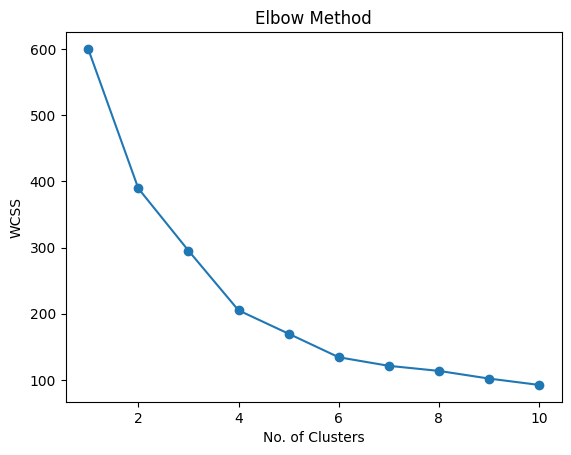

In [9]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()


Train the Model
n_clusters=4: from elbow method, we choose 4 clusters.
fit_predict():
Fits the K-Means model to data.
Assigns each customer to a cluster (0, 1, 2, or 3).
A new column Cluster is added to your dataset.

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


Visualize Clusters
Scatterplot: Plots each customer by income vs. spending.
Color (hue): represents the cluster group.
You’ll see 4 (or chosen K) colored clusters showing distinct customer segments.

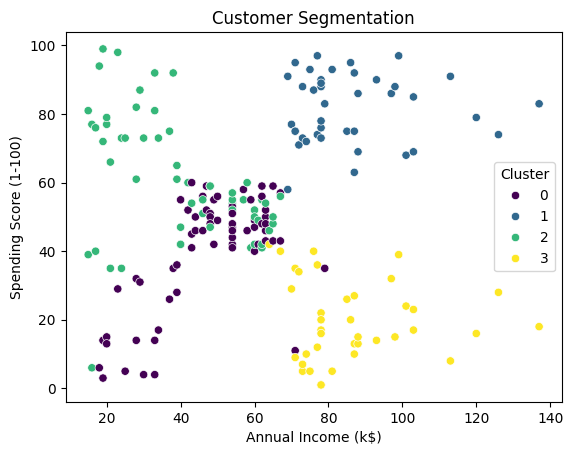

In [11]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=data, palette='viridis')
plt.title("Customer Segmentation")
plt.show()


Analyze Cluster Profiles
Groups customers by cluster and computes averages of each feature.
Helps you understand who each cluster represents.

In [15]:
profile = data.groupby('Cluster').mean(numeric_only=True)
print(profile)
 

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         69.415385  53.984615           47.707692               39.969231
1        161.025000  32.875000           86.100000               81.525000
2         53.438596  25.438596           40.000000               60.298246
3        160.552632  39.368421           86.500000               19.578947


Save the profile

In [16]:
data.to_csv("segmented_customers.csv", index=False)


joblib is a lightweight library used for saving (serializing) and loading (deserializing) Python objects to disk.

It’s especially efficient for scikit-learn models, because it handles large NumPy arrays and binary data quickly.

It comes pre-installed with most scikit-learn environments, so you usually don’t need to install it separately.

In [17]:
import joblib

# Save the trained model
joblib.dump(kmeans, "kmeans_customer_segmentation.pkl")


['kmeans_customer_segmentation.pkl']